In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [17]:
red = pd.read_csv("data/winequality-red.csv", sep=';')
white = pd.read_csv("data/winequality-white.csv", sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
red.describe()
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


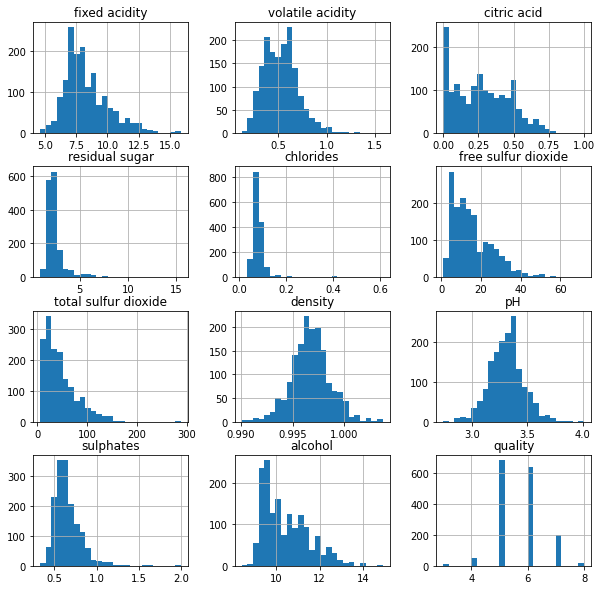

In [19]:
red.hist(bins=25,figsize=(10,10))
plt.show()

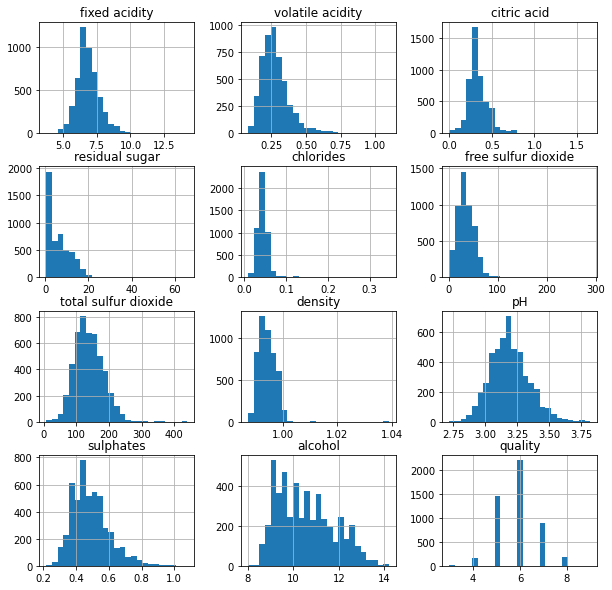

In [20]:
white.hist(bins=25,figsize=(10,10))
plt.show()

In [21]:
features = red.drop(["quality"], axis=1)
targets = red['quality']
wFeatures = white.drop(["quality"], axis=1)
wTargets = white['quality']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(wFeatures, wTargets, test_size=0.1)

In [32]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)

print(new_xtrain)

[[0.3125     0.23529412 0.10240964 ... 0.37272727 0.30232558 0.12903226]
 [0.3125     0.12745098 0.18674699 ... 0.7        0.53488372 0.48387097]
 [0.3875     0.23529412 0.09638554 ... 0.45454545 0.18604651 0.24193548]
 ...
 [0.35       0.17647059 0.31325301 ... 0.4        0.29069767 0.24193548]
 [0.225      0.17647059 0.30120482 ... 0.46363636 0.31395349 0.40322581]
 [0.2625     0.18627451 0.1626506  ... 0.34545455 0.12790698 0.61290323]]


In [33]:
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

In [34]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(new_xtrain, y_train) 
pred_train_lasso = model_lasso.predict(new_xtrain)
print("MSE:", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Test Score:",model_lasso.score(new_xtest, y_test))
print("Training Score:", model_lasso.score(new_xtrain, y_train))

MSE: 0.7819023481627769
Test Score: 0.21963246409143344
Training Score: 0.22253412192684285


In [35]:
rr = Ridge(alpha=0.01)
rr.fit(new_xtrain, y_train) 
pred_train_rr= rr.predict(new_xtrain)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))


pred_test_rr= rr.predict(new_xtest)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
rr.score(new_xtest, y_test), rr.score(new_xtrain, y_train)

0.7522553815552812
0.7346519661476881


(0.28985064294123175, 0.28037389488550724)